L1 and L2 regularization are techniques used to prevent overfitting in machine learning models, particularly in linear models like linear regression and logistic regression.

**L1 Regularization (Lasso Regression):**

- L1 regularization adds a penalty term to the cost function that is proportional to the absolute value of the coefficients of the features. 

- It penalizes the sum of the absolute values of the model parameters.

- λ is the regularization strength hyperparameter, controlling how much the regularization term should affect the overall loss function. Larger values of 

- λ result in more aggressive regularization.

**L1 regularization tends to produce sparse models, meaning it encourages some of the coefficients to be exactly zero, effectively performing feature selection.**

**L2 Regularization (Ridge Regression):**

- L2 regularization adds a penalty term to the cost function that is proportional to the square of the coefficients of the features. 

- It penalizes the sum of the squares of the model parameters.

- λ is the regularization strength hyperparameter.

- L2 regularization encourages smaller but non-zero coefficients. It does not typically result in sparse solutions as L1 regularization does.

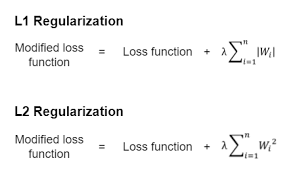

The choice between L1 and L2 regularization depends on the specific problem and the desired properties of the resulting model:

L1 regularization is often preferred when feature selection is desired or when there are a large number of irrelevant features in the dataset.
    
L2 regularization is generally more stable and is preferred when feature selection is not a primary concern.
    
Both L1 and L2 regularization techniques are used to prevent overfitting by penalizing large coefficient values, encouraging simpler models that generalize better to unseen data.

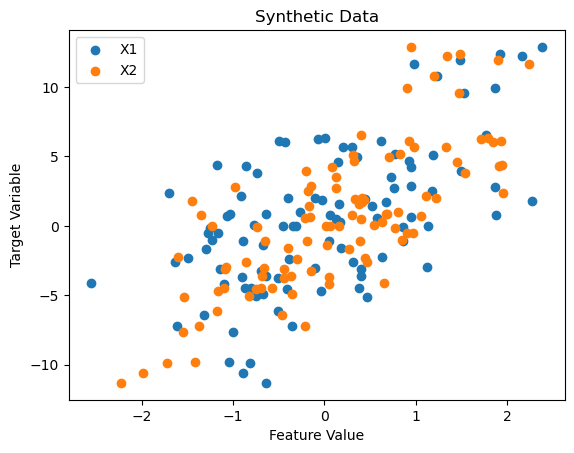

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)  # Two features
# Target variable is a linear combination of features plus noise
y = X.dot(np.array([3, 4])) + np.random.randn(n_samples)

# Plot the data
plt.scatter(X[:, 0], y, label='X1')
plt.scatter(X[:, 1], y, label='X2')
plt.xlabel('Feature Value')
plt.ylabel('Target Variable')
plt.legend()
plt.title('Synthetic Data')
plt.show()


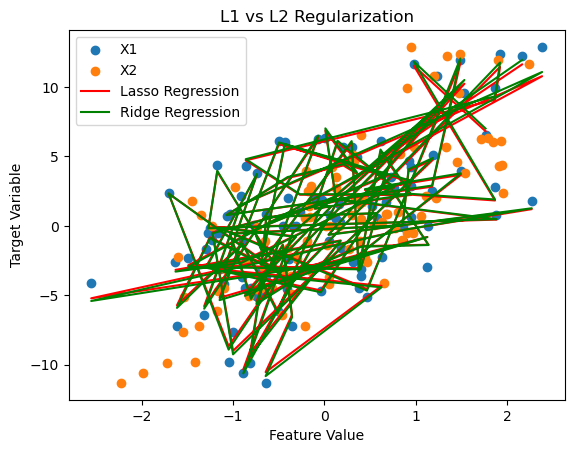

In [2]:
from sklearn.linear_model import Lasso, Ridge

# Fit Lasso regression (L1 regularization)
lasso_reg = Lasso(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
lasso_reg.fit(X, y)

# Fit Ridge regression (L2 regularization)
ridge_reg = Ridge(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
ridge_reg.fit(X, y)

# Plot the data and the models
plt.scatter(X[:, 0], y, label='X1')
plt.scatter(X[:, 1], y, label='X2')
plt.plot(X[:, 0], lasso_reg.predict(X), label='Lasso Regression', color='red')
plt.plot(X[:, 0], ridge_reg.predict(X), label='Ridge Regression', color='green')
plt.xlabel('Feature Value')
plt.ylabel('Target Variable')
plt.legend()
plt.title('L1 vs L2 Regularization')
plt.show()


## Elastic Regression

Elastic Net regression is a regularization technique that combines both L1 and L2 regularization penalties in order to achieve a balance between the benefits of each.

In Elastic Net, the cost function is a combination of the L1 and L2 regularization terms:

Alpha is the regularization strength parameter (similar to lambda in the equation above), controlling the overall strength of the regularization. 

The l1_ratio parameter controls the balance between the L1 and L2 penalties. 

A l1_ratio of 1 corresponds to Lasso regression, and a l1_ratio of 0 corresponds to Ridge regression. 

Adjusting these hyperparameters allows you to fine-tune the Elastic Net regression model to your specific dataset.

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 176.02832750565074


In [6]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
X,y

(array([[-9.26930472e-01, -1.43014138e+00,  1.63241130e+00,
         -3.24126734e+00, -1.24778318e+00, -1.02438764e+00,
          1.30740577e-01, -5.95253561e-02, -2.52568151e-01,
         -4.40044487e-01],
        [ 2.02923021e-01,  3.34456790e-01,  2.85865391e-01,
          1.54750520e+00, -3.87701560e-01,  1.79587767e+00,
          2.01020454e+00, -1.51574411e+00, -6.12788690e-01,
          6.58544273e-01],
        [-2.41236058e-01,  4.56753219e-01,  3.42725346e-01,
         -1.25153942e+00,  1.11729583e+00,  1.44376460e+00,
          4.47708560e-01,  3.52055397e-01, -8.21511784e-02,
          5.69767280e-01],
        [ 2.89774857e-01, -1.00808631e+00, -2.03812454e+00,
          8.71124703e-01, -4.08075373e-01, -3.26023532e-01,
         -3.51513484e-01,  2.07540080e+00,  1.20121392e+00,
         -1.87079192e+00],
        [-7.97264132e-03, -1.90338678e-01, -1.03724615e+00,
          7.73683076e-02,  5.38910044e-01, -8.61284201e-01,
         -1.38279973e+00,  1.47994414e+00,  1.523124

In [10]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Generate synthetic data

df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Naresh IT\\Datafiles\\winequality_red.csv")
X=df.drop('quality',axis=1)
y=df['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.4880295981151681


In [12]:
from sklearn.metrics import r2_score,mean_squared_error
R2=r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
#MSE**(1/2)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-sqaure: 0.25321312561465037
MSE: 0.4880295981151681
RMSE: 0.6985911523310098
